# Visualizing Logistic Regression

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

%matplotlib notebook


## Defining the model

### Hypothesis function

In [2]:
# Function to predict the chance of belonging to the +ve class for given features and weight configuration

def predict(weights, X):
    z = X.dot(weights)
    return 1 / (1 + np.exp(-z))
    

### Cost and Gradient

In [3]:
# Functions to give the cost/penalty and gradient for a given weight configuration

#------------------------------------------------------#
#                 COST (Regularized)                   #
#------------------------------------------------------#
def cost(weights, X, y, reg_param):
    m = len(y) # number of samples

    h = predict(weights, X)
    cost = np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h)) / (2 * m)
    cost += (reg_param * np.sum(weights[1:] ** 2)) / (2 * m)

    return cost


#------------------------------------------------------#
#                GRADIENT (Regularized)                #
#------------------------------------------------------#
def gradient(weights, X, y, reg_param):
    m = len(y)  # number of samples

    h = predict(weights, X)
    grad = X.transpose().dot(h - y) / m
    grad[1:] += (reg_param * weights[1:]) / m 

    return grad


### Training function : Gradient descent

In [4]:
# Performs gradient descent to minimize cost

def gradientDescent(weights, X, y, learning_rate, reg_param, iterations):
    m = len(y) # number of samples

    for i in range(iterations):
        weights -= learning_rate * gradient(weights, X, y, reg_param)
    
    return weights
    

## Training and testing the model : 1
Logistic Regression to separate linearly separable data

### Loading data

In [5]:
data = pd.read_csv('data1.txt', header=None)

X = data.iloc[:, :2].to_numpy()
y = data.iloc[:, 2:].to_numpy()

# normalize X
X = (X - np.mean(X)) / np.std(X)


### Visualizing data

<IPython.core.display.Javascript object>


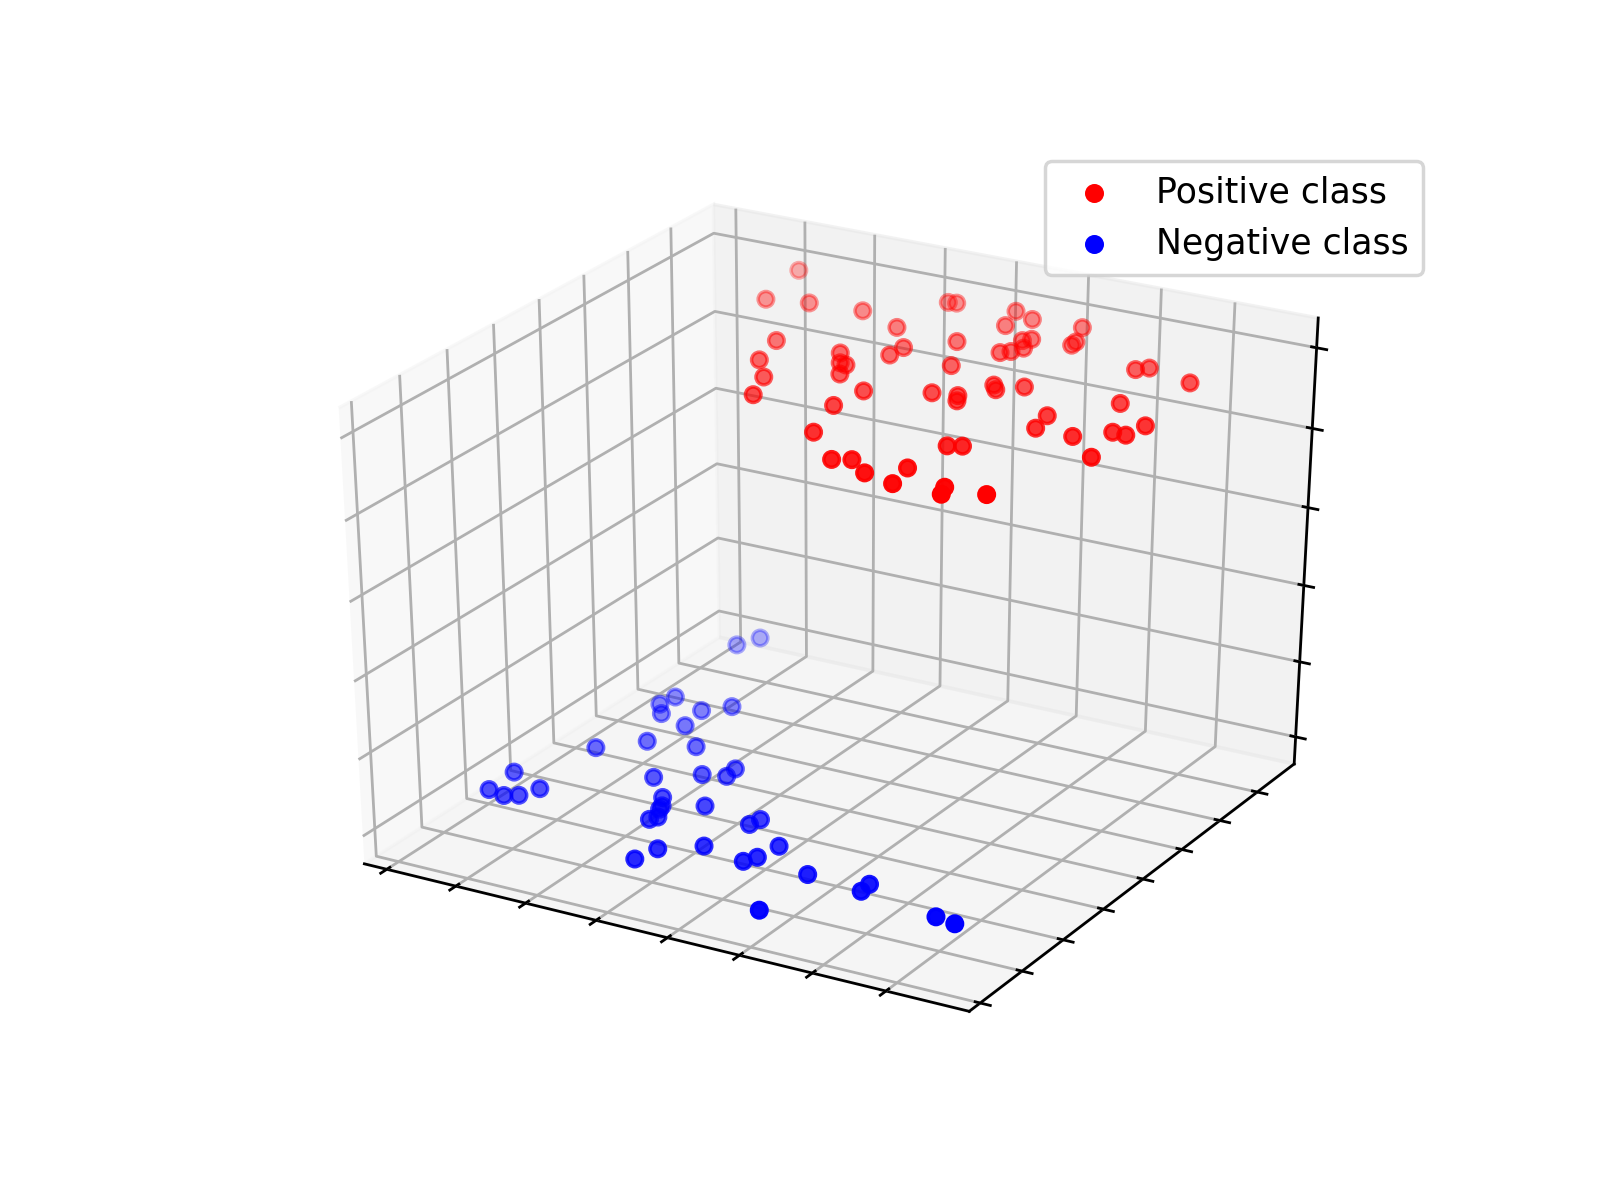

In [6]:
fig = plt.figure('Data Points - 1')
ax = fig.gca(projection='3d')

positive = np.where(y == 1)[0]
negative = np.where(y == 0)[0]

ax.scatter(X[positive, 0], X[positive, 1], y[positive], color='red', label='Positive class')
ax.scatter(X[negative, 0], X[negative, 1], y[negative], color='blue', label='Negative class')

ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])
ax.get_zaxis().set_ticklabels([])

ax.legend()

plt.show()

### Preparing data : Adding intercept and splitting

In [7]:
# adding the intercept term

#------------------------------------------------------#
#                 ADDING INTERCEPT TERM                #
#------------------------------------------------------#
intercept = np.ones((X.shape[0], X.shape[1]+1))
intercept[:, 1:] = X
X = intercept


#------------------------------------------------------#
#                    SPLITTING DATA                    #
#------------------------------------------------------#
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0)


### Optimizing the cost and finding optimal weights

In [8]:
# set up inital weights
weights = np.ones((train_X.shape[1], 1))

# initial cost 
print(f'Initial cost : {cost(weights, train_X, train_y, reg_param=1)}')


# Optimize the cost using gradient descent
weights = gradientDescent(weights, train_X, train_y, learning_rate=0.01, reg_param = 1, iterations=3000)

# optimized cost
print(f'Optimized cost : {cost(weights, train_X, train_y, reg_param=1)}')

Initial cost : 0.18916512539608488
Optimized cost : 0.1657659299556528


### Visualizing predictions

<IPython.core.display.Javascript object>


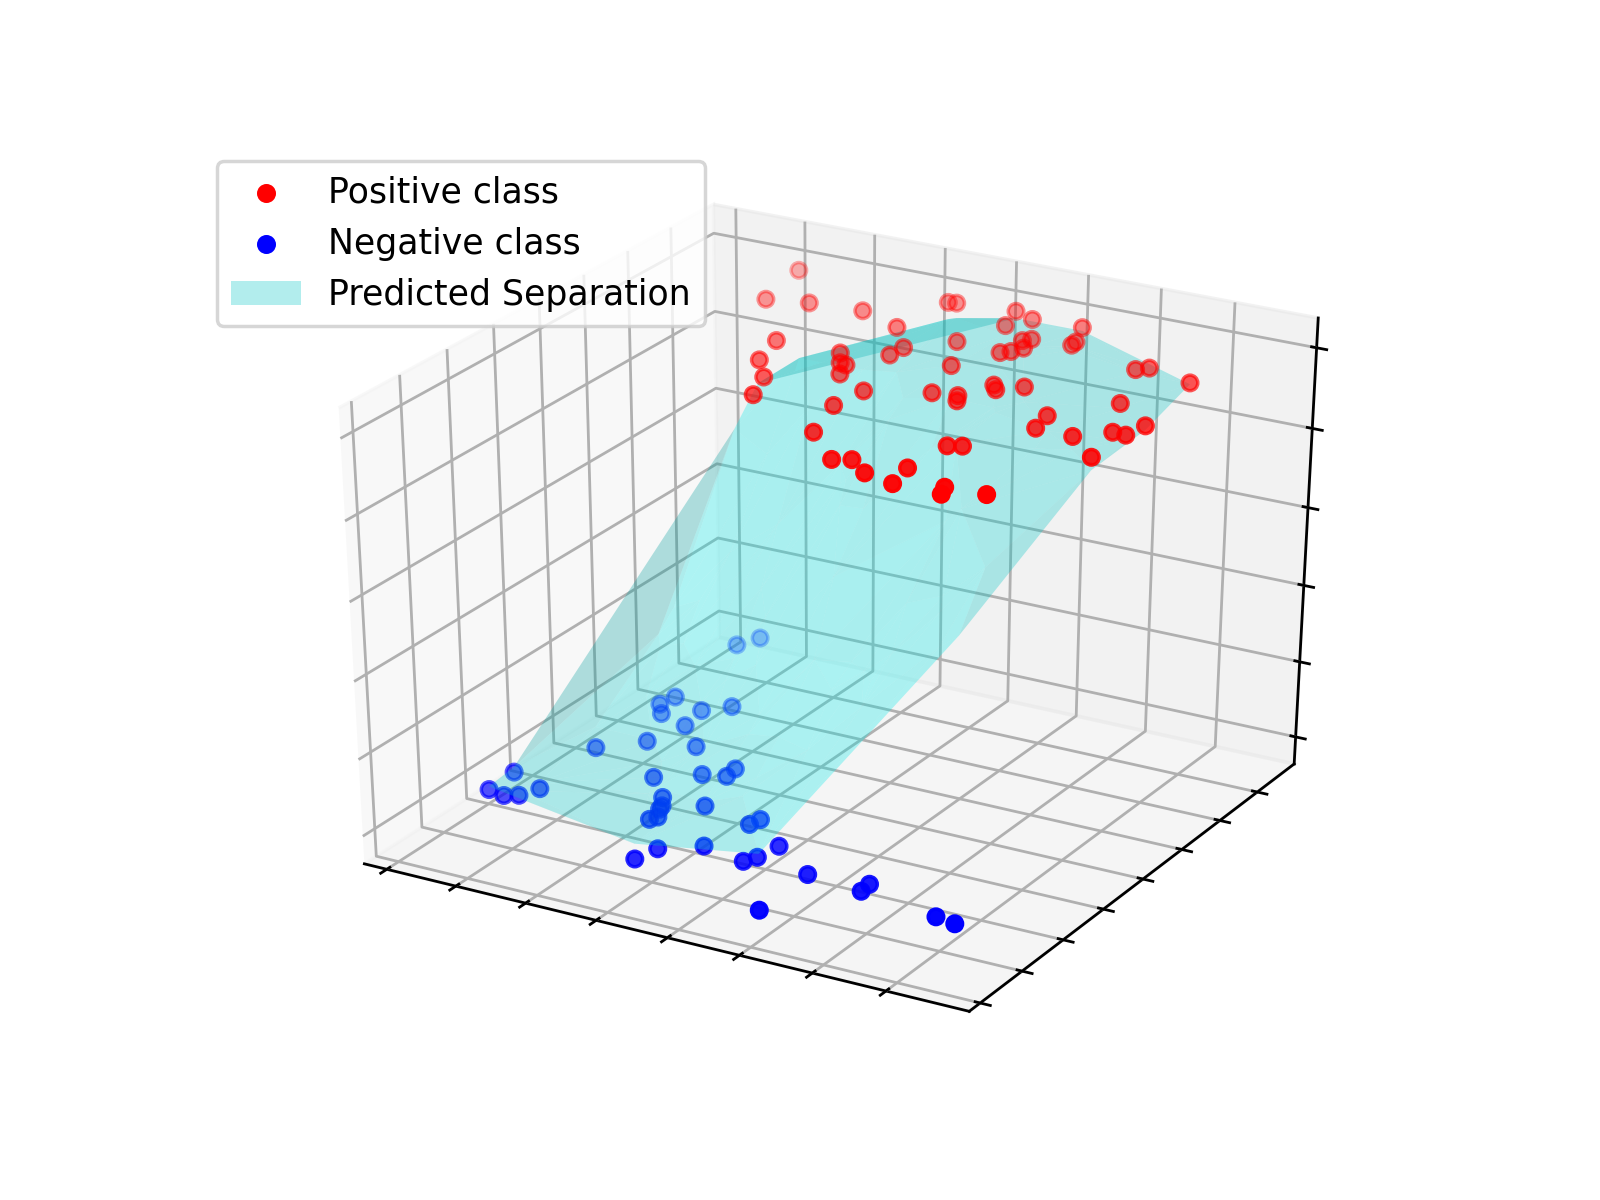

In [9]:
# testing the model
predictions = predict(weights, X)

_x = X[:, 1].squeeze()
_y = X[:, 2].squeeze()
pred = predictions.squeeze()

fig = plt.figure('Prediction - 1')
ax = fig.gca(projection='3d')

ax.scatter(X[positive, 1], X[positive, 2], y[positive], color='red', label='Positive class')
ax.scatter(X[negative, 1], X[negative, 2], y[negative], color='blue', label='Negative class')

surface = ax.plot_trisurf(_x, _y, pred, alpha=0.3, color='cyan', label='Predicted Separation')
surface._facecolors2d = surface._facecolors3d
surface._edgecolors2d = surface._edgecolors3d

ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])
ax.get_zaxis().set_ticklabels([])

ax.legend()

plt.show()

### Plotting learning curves

<IPython.core.display.Javascript object>


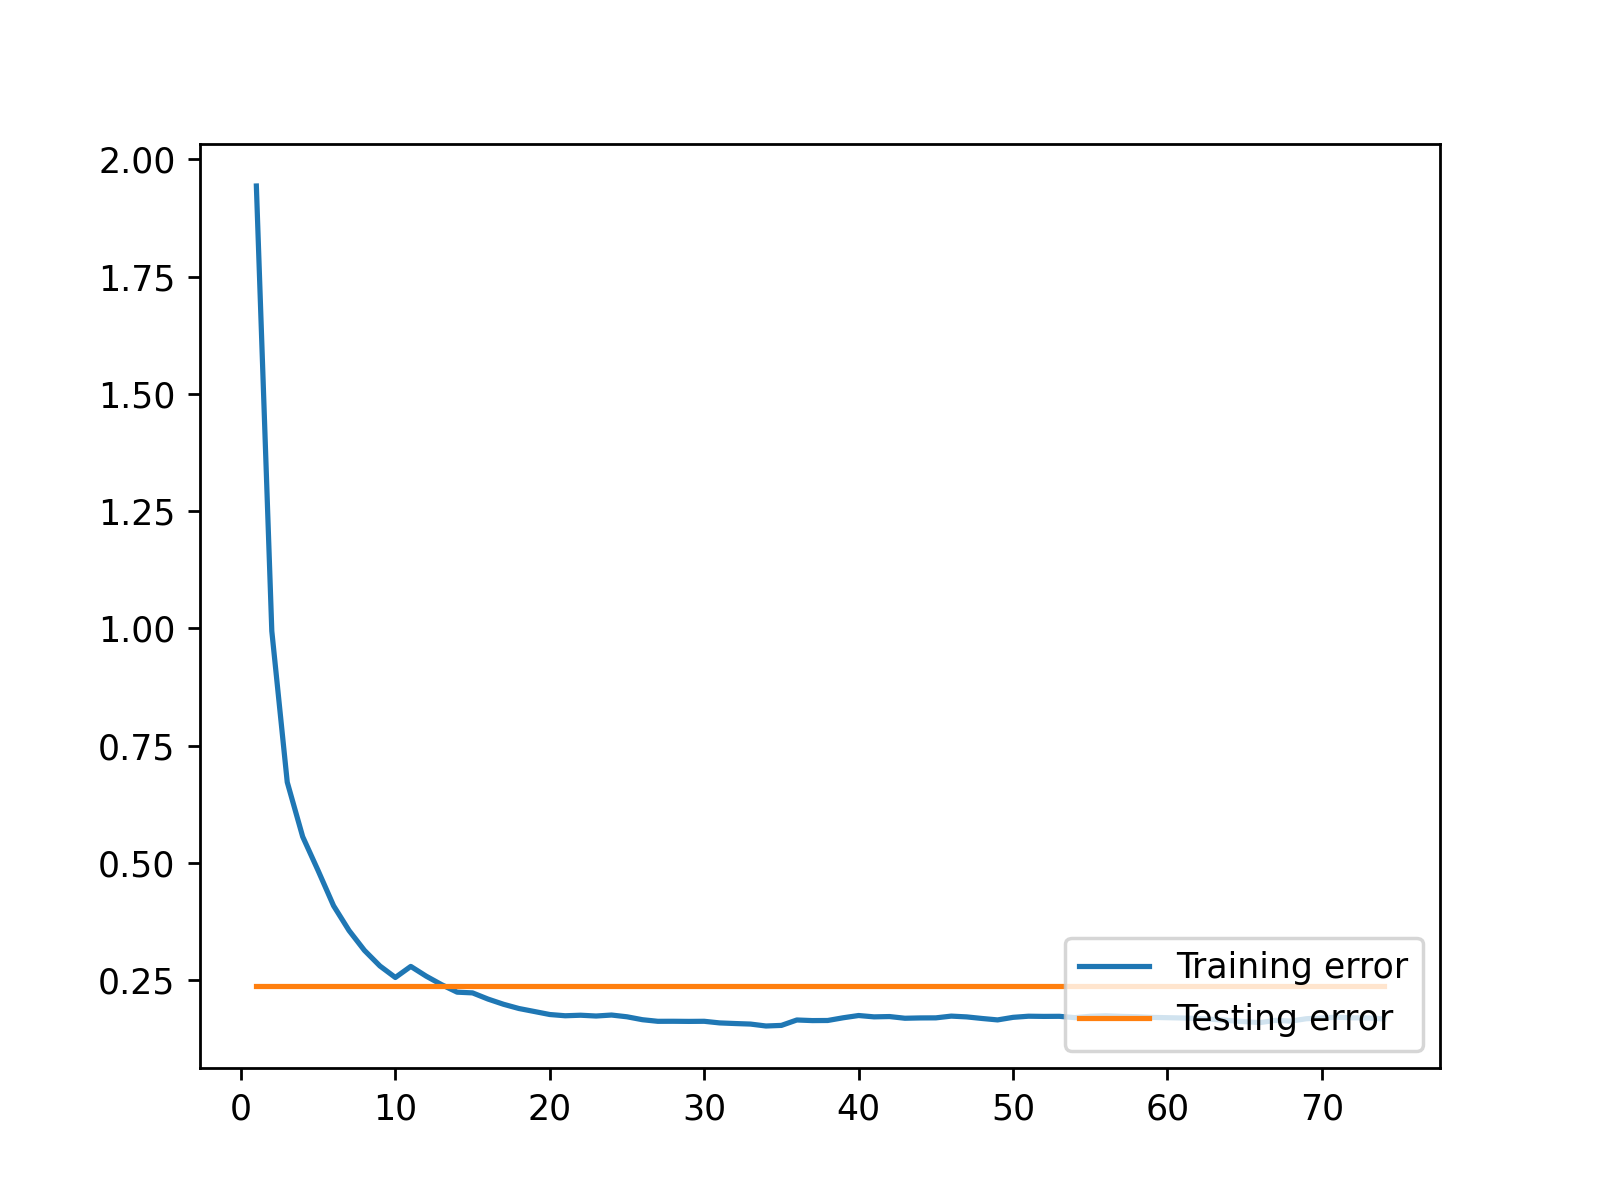

In [10]:
train_errors = []
test_errors = []

for i in range(1, len(train_X)):
    _x = train_X[:i, :]
    _y = train_y[:i]
    
    weights = np.zeros((train_X.shape[1], 1))
    weights = gradientDescent(weights, train_X, train_y, learning_rate=0.01, reg_param=1,  iterations=1500)
    
    train_errors.append(cost(weights, _x, _y, 1))
    test_errors.append(cost(weights, test_X, test_y, 1))
    
    
fig = plt.figure('Learning curves - 1')

m = list(range(1, len(train_X)))
plt.plot(m, train_errors, label='Training error')
plt.plot(m, test_errors, label='Testing error')
plt.legend(loc='lower right')
plt.show()

## Training and testing the model : 2
Logistic Regression to separate linearly inseparable data

### Loading data

In [11]:
data = pd.read_csv('data2.txt', header=None)

X = data.iloc[:, :2].to_numpy()
y = data.iloc[:, 2:].to_numpy()

# normalize X
X = (X - np.mean(X)) / np.std(X)


### Visualizing data

<IPython.core.display.Javascript object>


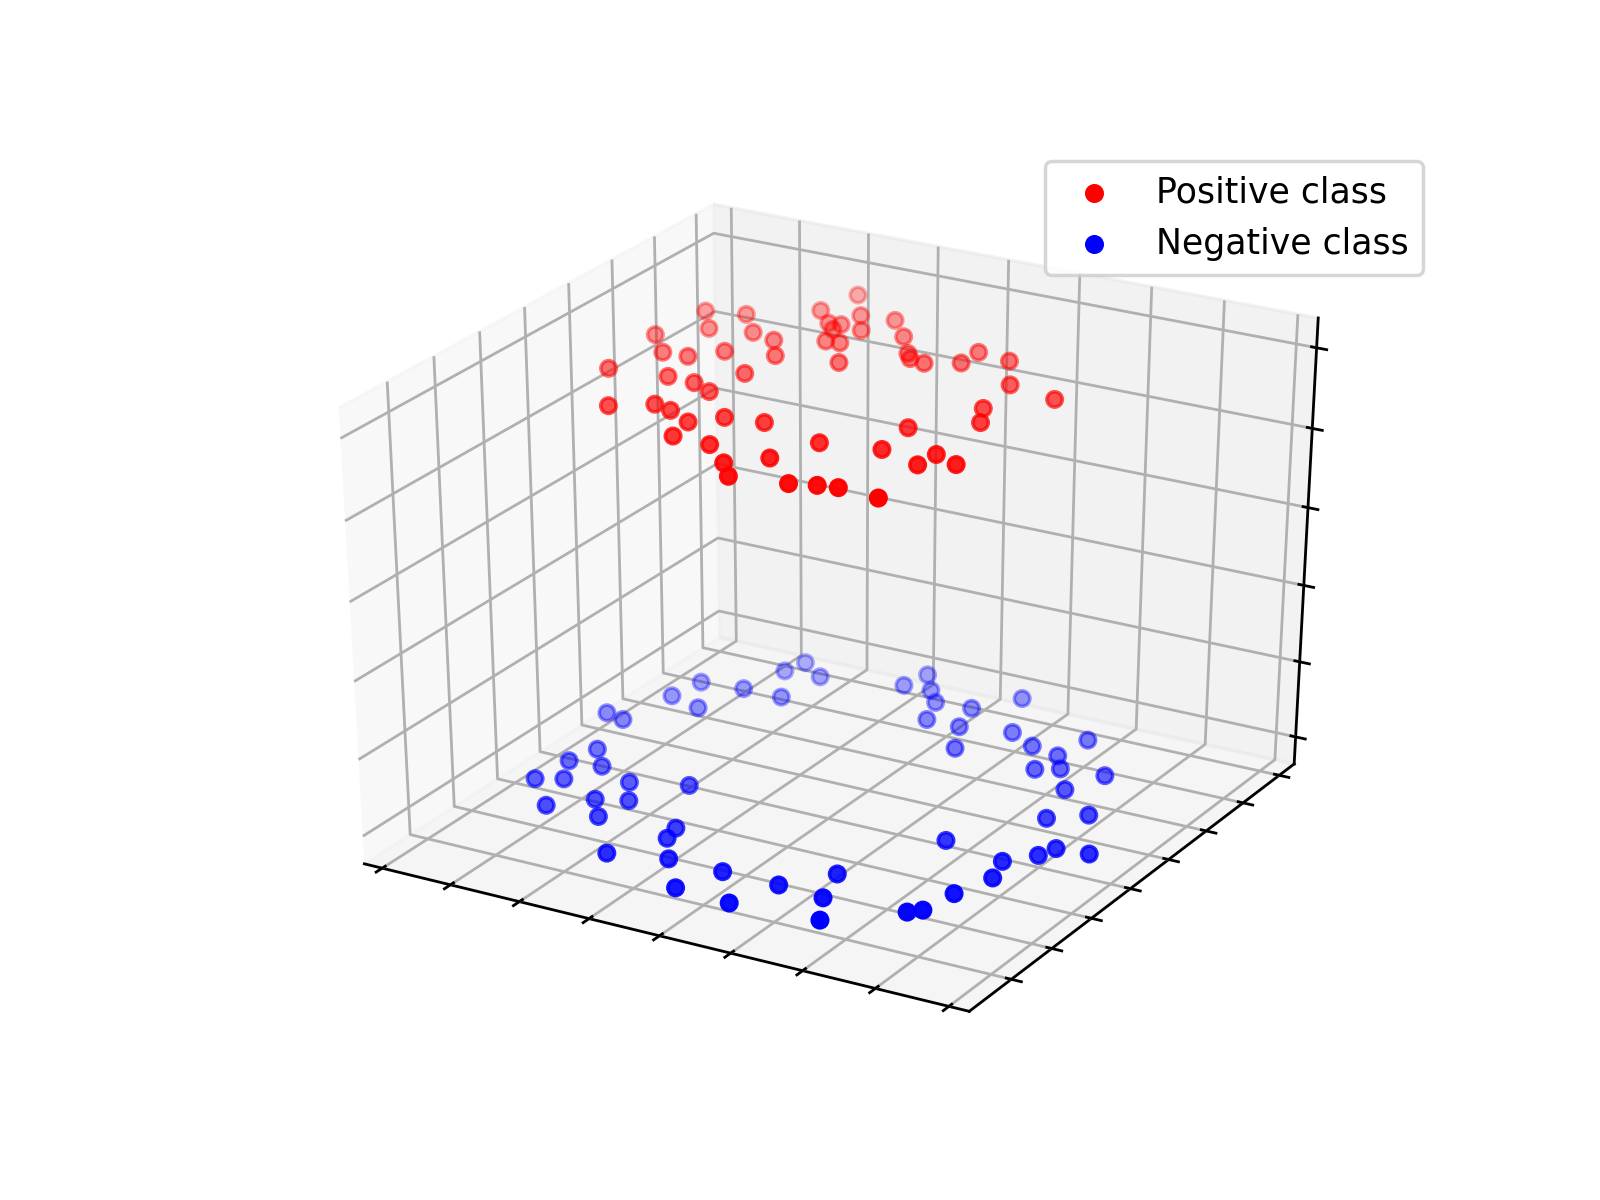

In [12]:
fig = plt.figure('Data Points - 2')
ax = fig.gca(projection='3d')

positive = np.where(y == 1)[0]
negative = np.where(y == 0)[0]

ax.scatter(X[positive, 0], X[positive, 1], y[positive], color='red', label='Positive class')
ax.scatter(X[negative, 0], X[negative, 1], y[negative], color='blue', label='Negative class')

ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])
ax.get_zaxis().set_ticklabels([])

ax.legend()

plt.show()

### Preparing data : Adding polynomial features, intercept and splitting

In [13]:
#------------------------------------------------------#
#            ADDING POLYNOMIAL FEATURES                #
#------------------------------------------------------#
X_poly = PolynomialFeatures(6).fit_transform(X)


#------------------------------------------------------#
#                 ADDING INTERCEPT TERM                #
#------------------------------------------------------#
intercept = np.ones((X_poly.shape[0], X_poly.shape[1]+1))
intercept[:, 1:] = X_poly
X_poly = intercept


#------------------------------------------------------#
#                    SPLITTING DATA                    #
#------------------------------------------------------#
train_X, test_X, train_y, test_y = train_test_split(X_poly, y, random_state=0)


### Optimizing the cost and finding optimal weights

In [14]:
# set up inital weights
weights = np.ones((train_X.shape[1], 1))

# initial cost 
print(f'Initial cost : {cost(weights, train_X, train_y, reg_param=1)}')


# Optimize the cost using gradient descent
weights = gradientDescent(weights, train_X, train_y, learning_rate=0.01, reg_param = 1, iterations=3000)

# optimized cost
print(f'Optimized cost : {cost(weights, train_X, train_y, reg_param=1)}')

Initial cost : inf
Optimized cost : 0.17849333220575517


C:\Users\Vishwa\miniconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


### Visualizing predictions

<IPython.core.display.Javascript object>


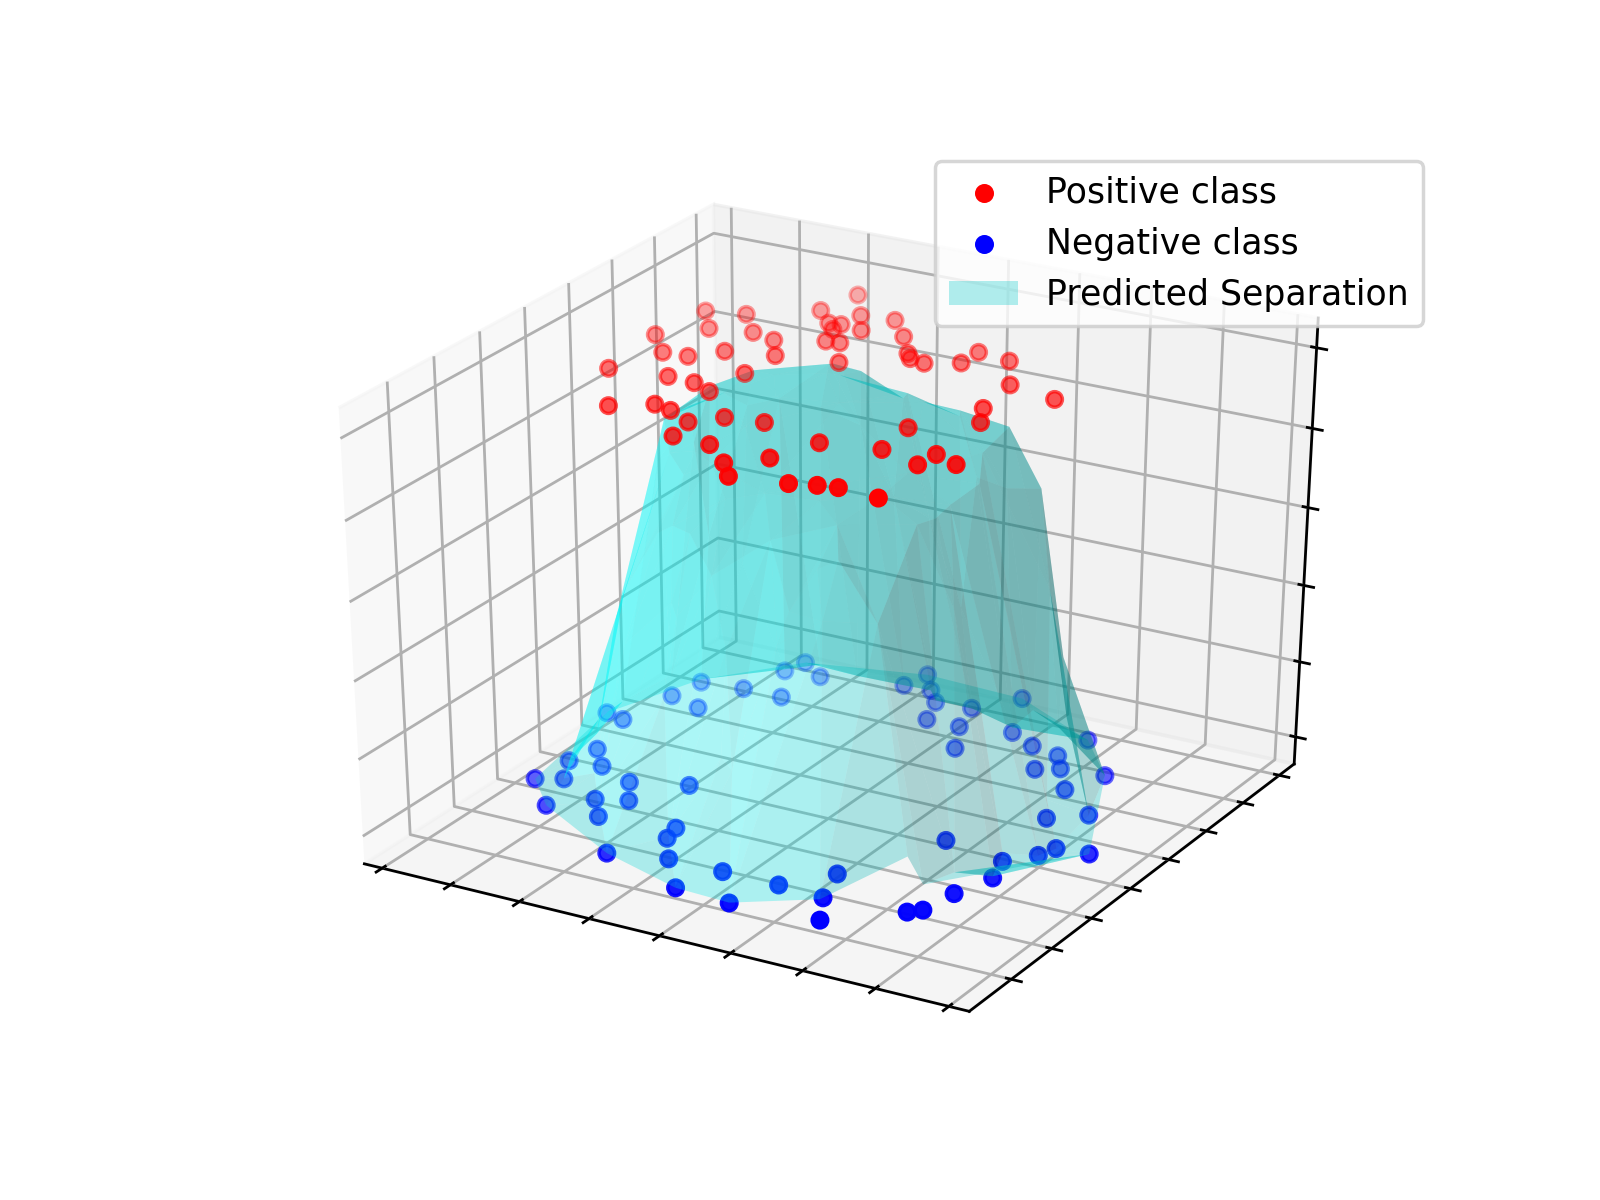

In [15]:
# testing the model
predictions = predict(weights, X_poly)

_x = X[:, 0].squeeze()
_y = X[:, 1].squeeze()
pred = predictions.squeeze()

fig = plt.figure('Prediction - 2')
ax = fig.gca(projection='3d')

ax.scatter(X[positive, 0], X[positive, 1], y[positive], color='red', label='Positive class')
ax.scatter(X[negative, 0], X[negative, 1], y[negative], color='blue', label='Negative class')

surface = ax.plot_trisurf(_x, _y, pred, alpha=0.3, color='cyan', label='Predicted Separation')
surface._facecolors2d = surface._facecolors3d
surface._edgecolors2d = surface._edgecolors3d

ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])
ax.get_zaxis().set_ticklabels([])

ax.legend()

plt.show()

### Plotting learning curves

<IPython.core.display.Javascript object>


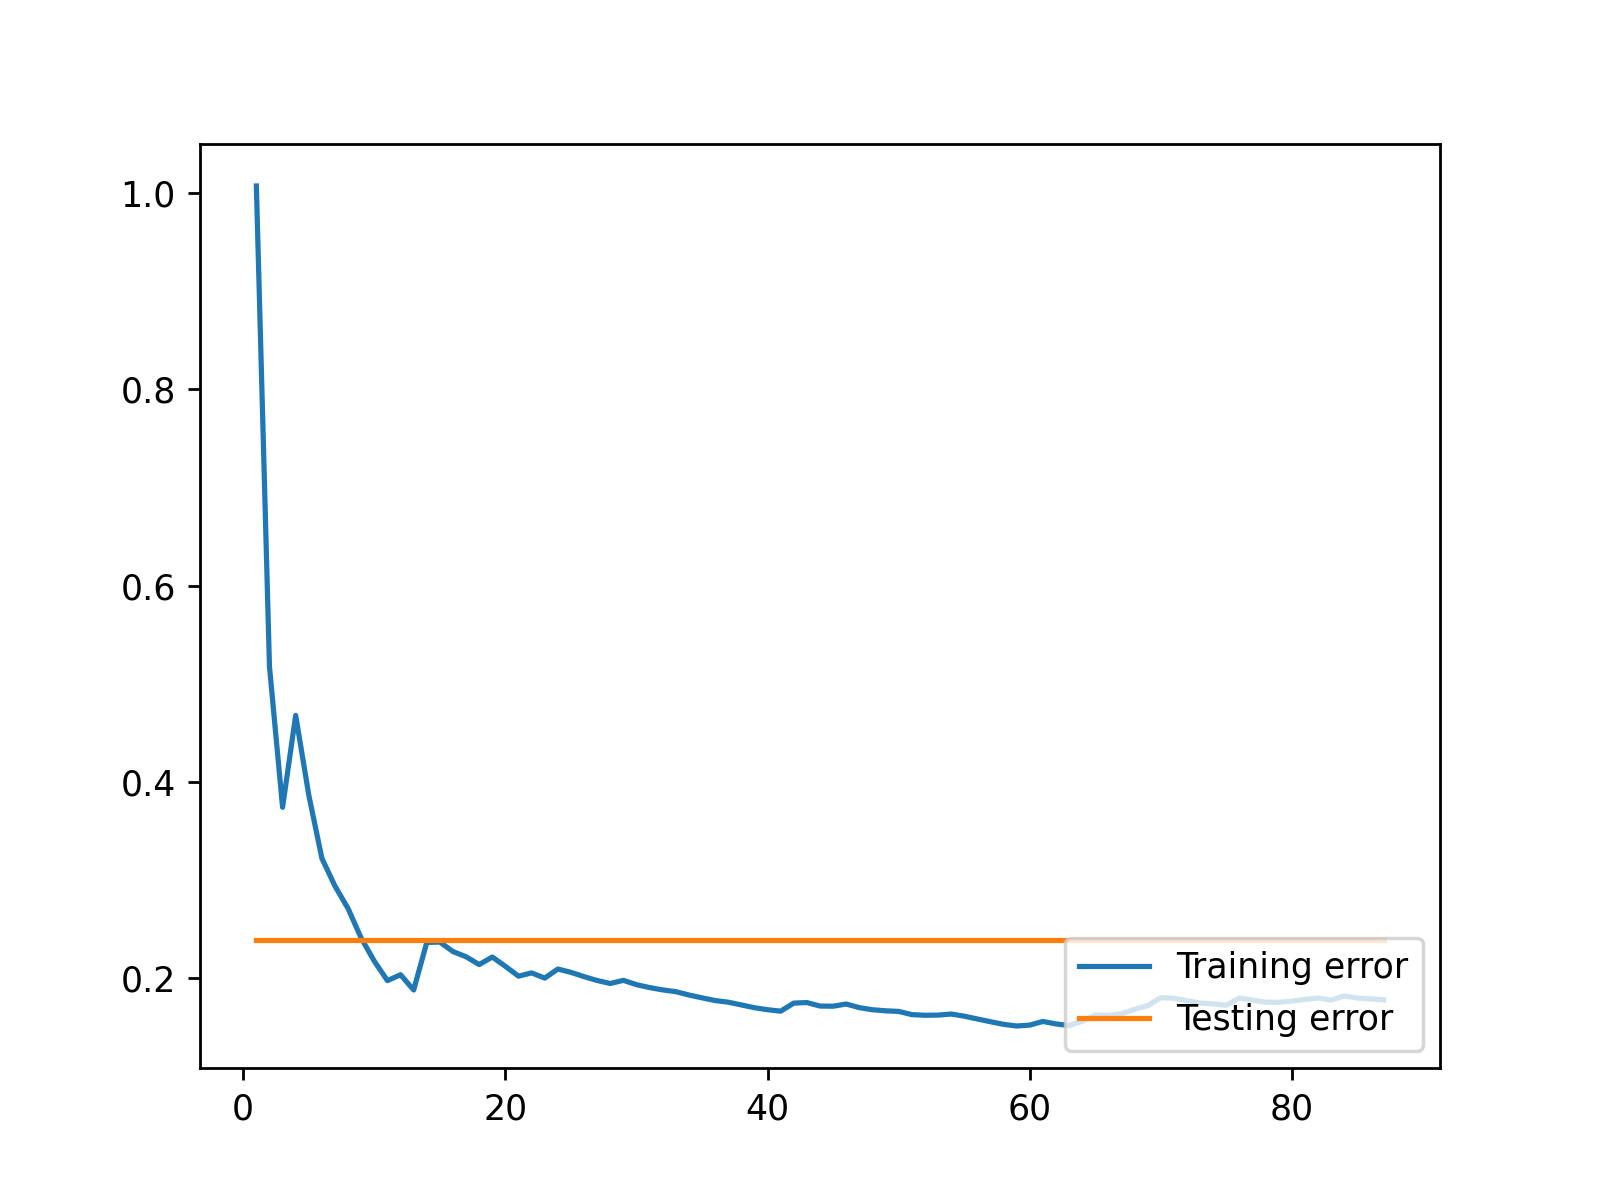

In [16]:
train_errors = []
test_errors = []

for i in range(1, len(train_X)):
    _x = train_X[:i, :]
    _y = train_y[:i]
    
    weights = np.zeros((train_X.shape[1], 1))
    weights = gradientDescent(weights, train_X, train_y, learning_rate=0.01, reg_param=1,  iterations=1500)
    
    train_errors.append(cost(weights, _x, _y, 1))
    test_errors.append(cost(weights, test_X, test_y, 1))
    
    
fig = plt.figure('Learning curves - 2')

m = list(range(1, len(train_X)))
plt.plot(m, train_errors, label='Training error')
plt.plot(m, test_errors, label='Testing error')
plt.legend(loc='lower right')
plt.show()